# 課題

ガンマ補正，およびその他の補正を実装せよ．

1. ガンマ補正

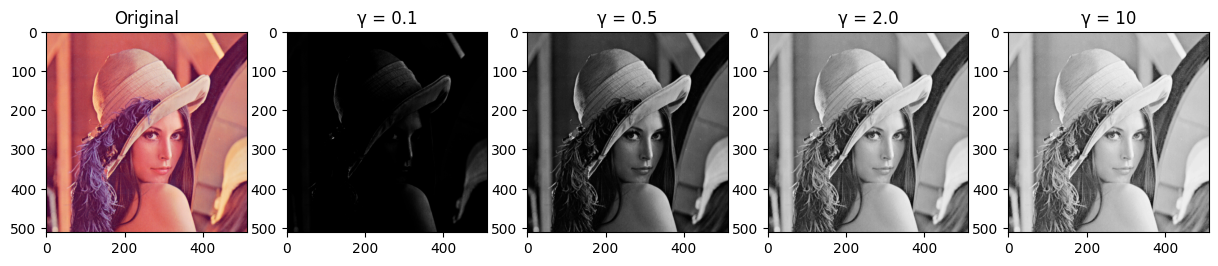

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def rgb2gray(img: np.ndarray):
    "RGB画像をグレースケールに変換する関数"
    r = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 2].copy()
    y = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return y.astype(np.uint8)

def gamma_correct(img: np.ndarray, g: float=2.2):
	"ガンマ補正を行う関数"
	out = img.copy() / 255

	out = (out)**(1 / g)
	out *= 255
	out = out.astype(np.uint8)
	
	return out

img = io.imread("imgs/lena.png")
plt.figure(figsize=(15, 3))
plt.subplot(1, 5, 1)
plt.title('Original')
plt.imshow(img)

img_gray = rgb2gray(img)

gammas = [0.1, 0.5, 2.0, 10]

for i, g in enumerate(gammas, start=2):
    img_gamma = gamma_correct(img_gray, g=g)
    plt.subplot(1, 5, i)
    plt.title(f'γ = {g}')
    plt.imshow(img_gamma, cmap="gray")

2. その他の補正

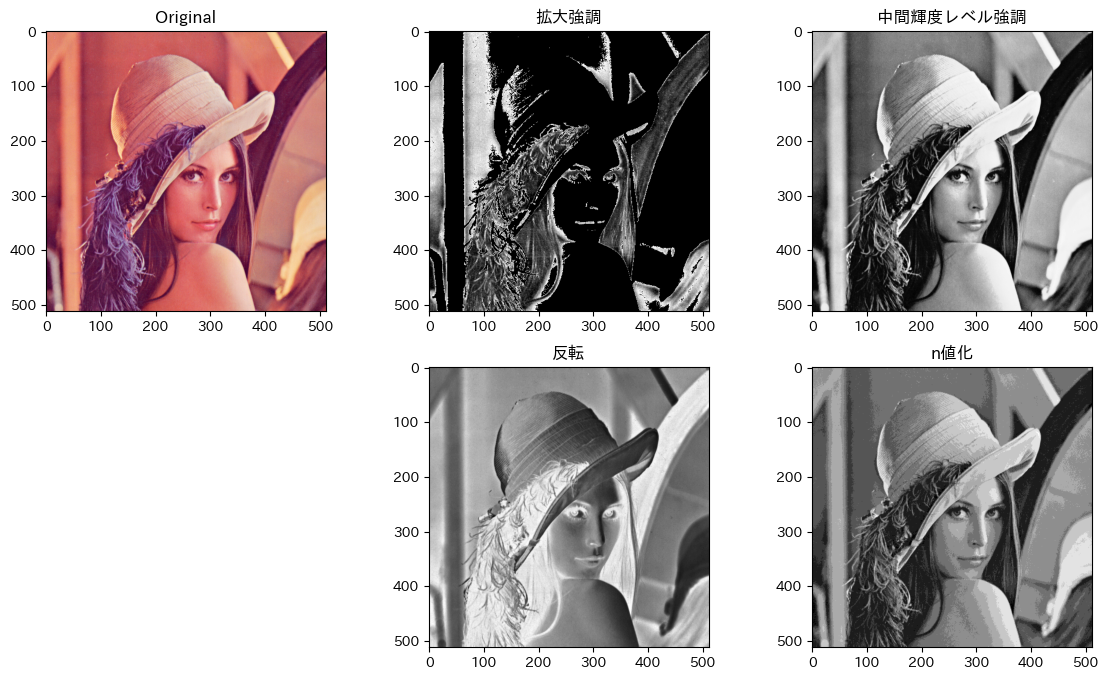

In [33]:
from typing import Callable
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def rgb2gray(img: np.ndarray):
    "RGB画像をグレースケールに変換する関数"
    r = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 2].copy()
    y = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return y.astype(np.uint8)

img = io.imread("imgs/lena.png")
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
plt.title('Original')
plt.imshow(img)

img_gray = rgb2gray(img)

# 拡大強調
def correct_range(_img: np.ndarray):
    img = _img.copy() / 255
    out = np.where((0.1 <= img) & (img <= 0.4), img / (0.4 - 0.1) + 1 - 0.4 / 0.3, 0)
    out *= 255
    return out

img_correct_range = correct_range(img_gray)
plt.subplot(2, 3, 2)
plt.title('拡大強調')
plt.imshow(img_correct_range, cmap="gray")


# 拡大強調
def correct_multi(_img: np.ndarray):
    img = _img.copy() / 255
    out_low = np.where((0.0 <= img) & (img < 0.2), (0.1 - 0.0) / (0.2 - 0.0) * img, 0)
    out_middle = np.where((0.2 <= img) & (img < 0.7), (0.9 - 0.1) / (0.7 - 0.2) * (img - 0.2) + 0.1, 0)
    out_high = np.where((0.7 <= img) & (img <= 1.0), (1.0 - 0.9) / (1.0 - 0.7) * (img - 0.7) + 0.9, 0)
    out = out_low + out_middle + out_high
    out *= 255
    return out

img_correct_multi = correct_multi(img_gray)
plt.subplot(2, 3, 3)
plt.title('中間輝度レベル強調')
plt.imshow(img_correct_multi, cmap="gray")

# 反転
def correct_reverse(_img: np.ndarray):
    img = _img.copy()
    out = 255 - img
    return out

img_correct_reverse = correct_reverse(img_gray)
plt.subplot(2, 3, 5)
plt.title('反転')
plt.imshow(img_correct_reverse, cmap="gray")

# n値化
def correct_steps(_img: np.ndarray, n: int=10):
    img = _img.copy() / 255
    out = (img * n).astype(np.int8) / n
    out *= 255
    return out

img_correct_steps = correct_steps(img_gray, n=10)
plt.subplot(2, 3, 6)
plt.title('n値化')
plt.imshow(img_correct_steps, cmap="gray")